# Exercise 08.3 (demographics and interactive plotting)

At the time of the 2011 census, the population of Cambridgeshire by district was:

District              | Population
---------------------:|------------:
Cambridge City        | 123900
East Cambridgeshire   | 83800
Fenland               | 95300
Huntingdonshire       | 169500
South Cambridgeshire  | 148800

A county planning body has requested an interactive tool to visualise the population distribution in Cambridgeshire (by district) from 2011 to 2021 for different population growth rate scenarios in each district. It can be assumed that:

- the growth rates are constant in each district;
- the growth rate will not be negative in any district; and 
- the annual growth rate in any one district will not exceed 10%.

In [1]:
# Import matplotlib and numpy for plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Import interact for interactive plotting
from ipywidgets import interact

# Plot inline in Jupyter notebook
%matplotlib inline

### Task: Create an interactive pie chart plot with:

1. A slider for the year (from 2011 to 2021); and
2. Sliders for the annual population growth for each district (in percentage), with an 
   initial value of zero for each district.

To create an interactive plot, we need to encapsulate our plot code inside a function, with the plot parameters as argument to the function:

We have used default function arguments - these will be the initial parameters for out interactive plot.

Next, we use the `interact` function, passing to it the name of our function that does the plotting 
(`plot` in this case), and a tuple for each parameters:

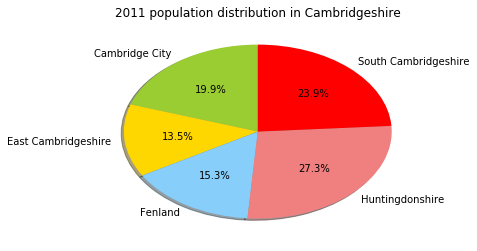

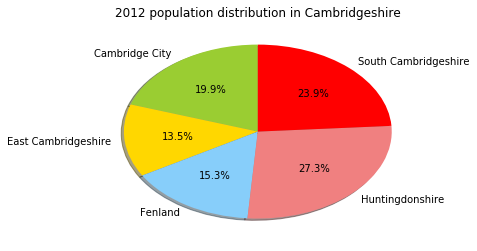

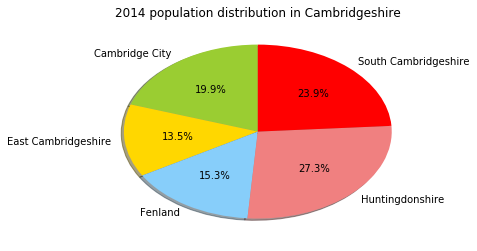

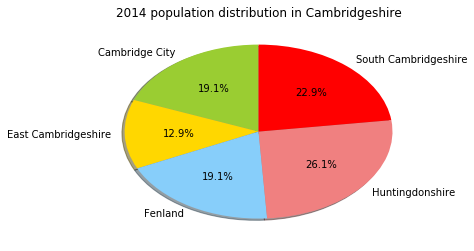

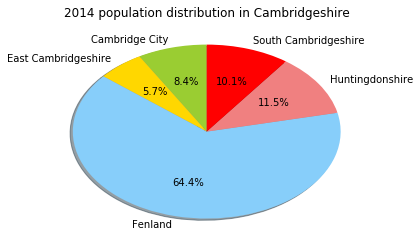

In [2]:
# Define decorator for constructing interaction widgets
@interact(year=(2011, 2021, 1),
          CambridgeCity=(0, 10, 0.1),
          EastCambridgeshire=(0, 10, 0.1),
          Fenland=(0, 10, 0.1),
          Huntingdonshire=(0, 10, 0.1),
          SouthCambridgeshire=(0, 10, 0.1))

# Create plot function with annotation
def plot(year=2011, CambridgeCity=0, EastCambridgeshire=0, Fenland=0, Huntingdonshire=0, SouthCambridgeshire=0):
    # Specify each district and initial population
    district = ['Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire', 'South Cambridgeshire']
    initials = np.array([123900, 83800, 95300, 169500, 148800])
    
    # Define colors for pie slices
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
    
    # How many years have past?
    time = year - 2011
    
    # Create list of deltas according to user rate inputs and years past
    deltas = time * np.array([CambridgeCity, EastCambridgeshire, Fenland, Huntingdonshire, SouthCambridgeshire])
    currents = initials + (initials * deltas)
    plt.pie(currents
            , labels=district, explode=None, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title("{} population distribution in Cambridgeshire".format(year));